# Algorithm Accuracy Comparison for Disease Prediction Models

This notebook compares the accuracy of machine learning algorithms used for predicting Diabetes, Heart Disease, and Parkinson's Disease. We load the pre-trained models and evaluate their performance on test data using confusion matrices and accuracy scores.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [9]:
# Load datasets
diabetes_data = pd.read_csv('diabetes.csv')
heart_data = pd.read_csv('heart.csv')
parkinsons_data = pd.read_csv('parkinsons.csv')

print("Datasets loaded successfully")
print(f"Diabetes data shape: {diabetes_data.shape}")
print(f"Heart data shape: {heart_data.shape}")
print(f"Parkinsons data shape: {parkinsons_data.shape}")

Datasets loaded successfully
Diabetes data shape: (768, 9)
Heart data shape: (303, 14)
Parkinsons data shape: (195, 24)


In [10]:
# Prepare data splits as in original notebooks

# Diabetes
X_diabetes = diabetes_data.drop(columns='Outcome', axis=1)
Y_diabetes = diabetes_data['Outcome']
X_train_d, X_test_d, Y_train_d, Y_test_d = train_test_split(X_diabetes, Y_diabetes, test_size=0.2, stratify=Y_diabetes, random_state=2)

# Heart Disease
X_heart = heart_data.drop(columns='target', axis=1)
Y_heart = heart_data['target']
X_train_h, X_test_h, Y_train_h, Y_test_h = train_test_split(X_heart, Y_heart, test_size=0.2, stratify=Y_heart, random_state=2)

# Parkinson's
X_parkinsons = parkinsons_data.drop(columns=['name', 'status'], axis=1)
Y_parkinsons = parkinsons_data['status']
X_train_p, X_test_p, Y_train_p, Y_test_p = train_test_split(X_parkinsons, Y_parkinsons, test_size=0.2, random_state=2)

print("Data splits prepared")
print(f"Diabetes test shape: {X_test_d.shape}")
print(f"Heart test shape: {X_test_h.shape}")
print(f"Parkinsons test shape: {X_test_p.shape}")

Data splits prepared
Diabetes test shape: (154, 8)
Heart test shape: (61, 13)
Parkinsons test shape: (39, 22)


In [11]:
# Load saved models
diabetes_model = pickle.load(open('diabetes_model.sav', 'rb'))
heart_model = pickle.load(open('heart_disease_model.sav', 'rb'))
parkinsons_model = pickle.load(open('parkinsons_model.sav', 'rb'))

print("Models loaded successfully")
print(f"Diabetes model: {type(diabetes_model).__name__}")
print(f"Heart model: {type(heart_model).__name__}")
print(f"Parkinsons model: {type(parkinsons_model).__name__}")

Models loaded successfully
Diabetes model: SVC
Heart model: LogisticRegression
Parkinsons model: SVC


c:\Users\sayud\anaconda3\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.5.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\sayud\anaconda3\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.5.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [12]:
# Make predictions and evaluate

# Diabetes
Y_pred_d = diabetes_model.predict(X_test_d)
Y_prob_d = diabetes_model.decision_function(X_test_d)  # For SVM, use decision_function
accuracy_d = accuracy_score(Y_test_d, Y_pred_d)
precision_d = precision_score(Y_test_d, Y_pred_d)
recall_d = recall_score(Y_test_d, Y_pred_d)
f1_d = f1_score(Y_test_d, Y_pred_d)
fpr_d, tpr_d, _ = roc_curve(Y_test_d, Y_prob_d)
auc_d = auc(fpr_d, tpr_d)
cm_d = confusion_matrix(Y_test_d, Y_pred_d)

# Heart
Y_pred_h = heart_model.predict(X_test_h)
Y_prob_h = heart_model.predict_proba(X_test_h)[:, 1]  # Logistic regression has predict_proba
accuracy_h = accuracy_score(Y_test_h, Y_pred_h)
precision_h = precision_score(Y_test_h, Y_pred_h)
recall_h = recall_score(Y_test_h, Y_pred_h)
f1_h = f1_score(Y_test_h, Y_pred_h)
fpr_h, tpr_h, _ = roc_curve(Y_test_h, Y_prob_h)
auc_h = auc(fpr_h, tpr_h)
cm_h = confusion_matrix(Y_test_h, Y_pred_h)

# Parkinson's
Y_pred_p = parkinsons_model.predict(X_test_p)
Y_prob_p = parkinsons_model.decision_function(X_test_p)  # SVM
accuracy_p = accuracy_score(Y_test_p, Y_pred_p)
precision_p = precision_score(Y_test_p, Y_pred_p)
recall_p = recall_score(Y_test_p, Y_pred_p)
f1_p = f1_score(Y_test_p, Y_pred_p)
fpr_p, tpr_p, _ = roc_curve(Y_test_p, Y_prob_p)
auc_p = auc(fpr_p, tpr_p)
cm_p = confusion_matrix(Y_test_p, Y_pred_p)

print("Predictions completed")
print(f"Diabetes - Accuracy: {accuracy_d:.4f}, Precision: {precision_d:.4f}, Recall: {recall_d:.4f}, F1: {f1_d:.4f}, AUC: {auc_d:.4f}")
print(f"Heart Disease - Accuracy: {accuracy_h:.4f}, Precision: {precision_h:.4f}, Recall: {recall_h:.4f}, F1: {f1_h:.4f}, AUC: {auc_h:.4f}")
print(f"Parkinson's - Accuracy: {accuracy_p:.4f}, Precision: {precision_p:.4f}, Recall: {recall_p:.4f}, F1: {f1_p:.4f}, AUC: {auc_p:.4f}")

Predictions completed
Diabetes - Accuracy: 0.7727, Precision: 0.7568, Recall: 0.5185, F1: 0.6154, AUC: 0.7900
Heart Disease - Accuracy: 0.8197, Precision: 0.8438, Recall: 0.8182, F1: 0.8308, AUC: 0.8907
Parkinson's - Accuracy: 0.8718, Precision: 0.8824, Recall: 0.9677, F1: 0.9231, AUC: 0.8387


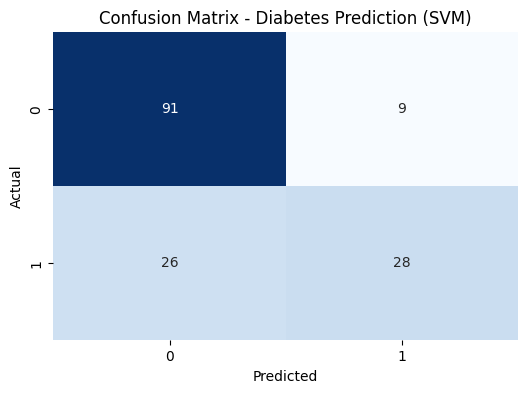

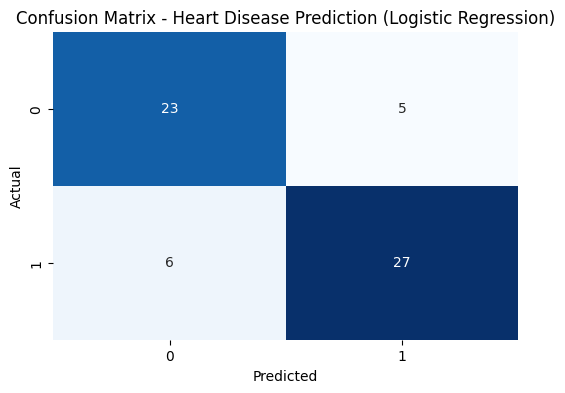

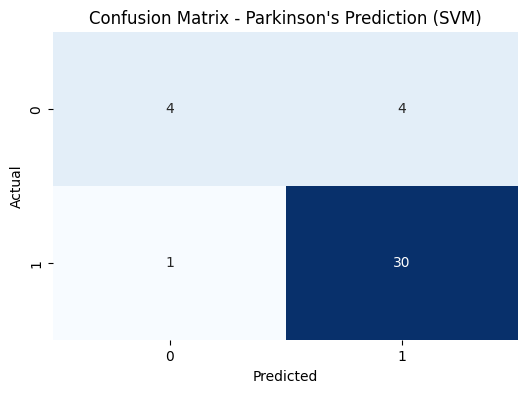

In [13]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(cm_d, 'Diabetes Prediction (SVM)')
plot_confusion_matrix(cm_h, 'Heart Disease Prediction (Logistic Regression)')
plot_confusion_matrix(cm_p, 'Parkinson\'s Prediction (SVM)')

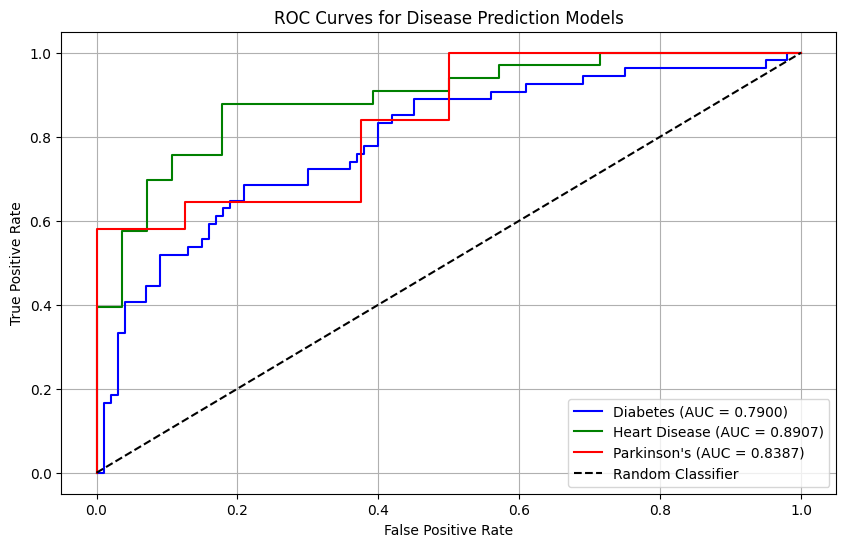

In [14]:
# Plot ROC curves
plt.figure(figsize=(10, 6))

plt.plot(fpr_d, tpr_d, label=f'Diabetes (AUC = {auc_d:.4f})', color='blue')
plt.plot(fpr_h, tpr_h, label=f'Heart Disease (AUC = {auc_h:.4f})', color='green')
plt.plot(fpr_p, tpr_p, label=f'Parkinson\'s (AUC = {auc_p:.4f})', color='red')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Disease Prediction Models')
plt.legend()
plt.grid(True)
plt.show()

Comprehensive Algorithm Performance Summary:
         Disease            Algorithm  Accuracy  Precision  Recall  F1 Score  \
0       Diabetes         SVM (Linear)    0.7727     0.7568  0.5185    0.6154   
1  Heart Disease  Logistic Regression    0.8197     0.8438  0.8182    0.8308   
2    Parkinson's         SVM (Linear)    0.8718     0.8824  0.9677    0.9231   

      AUC  
0  0.7900  
1  0.8907  
2  0.8387  


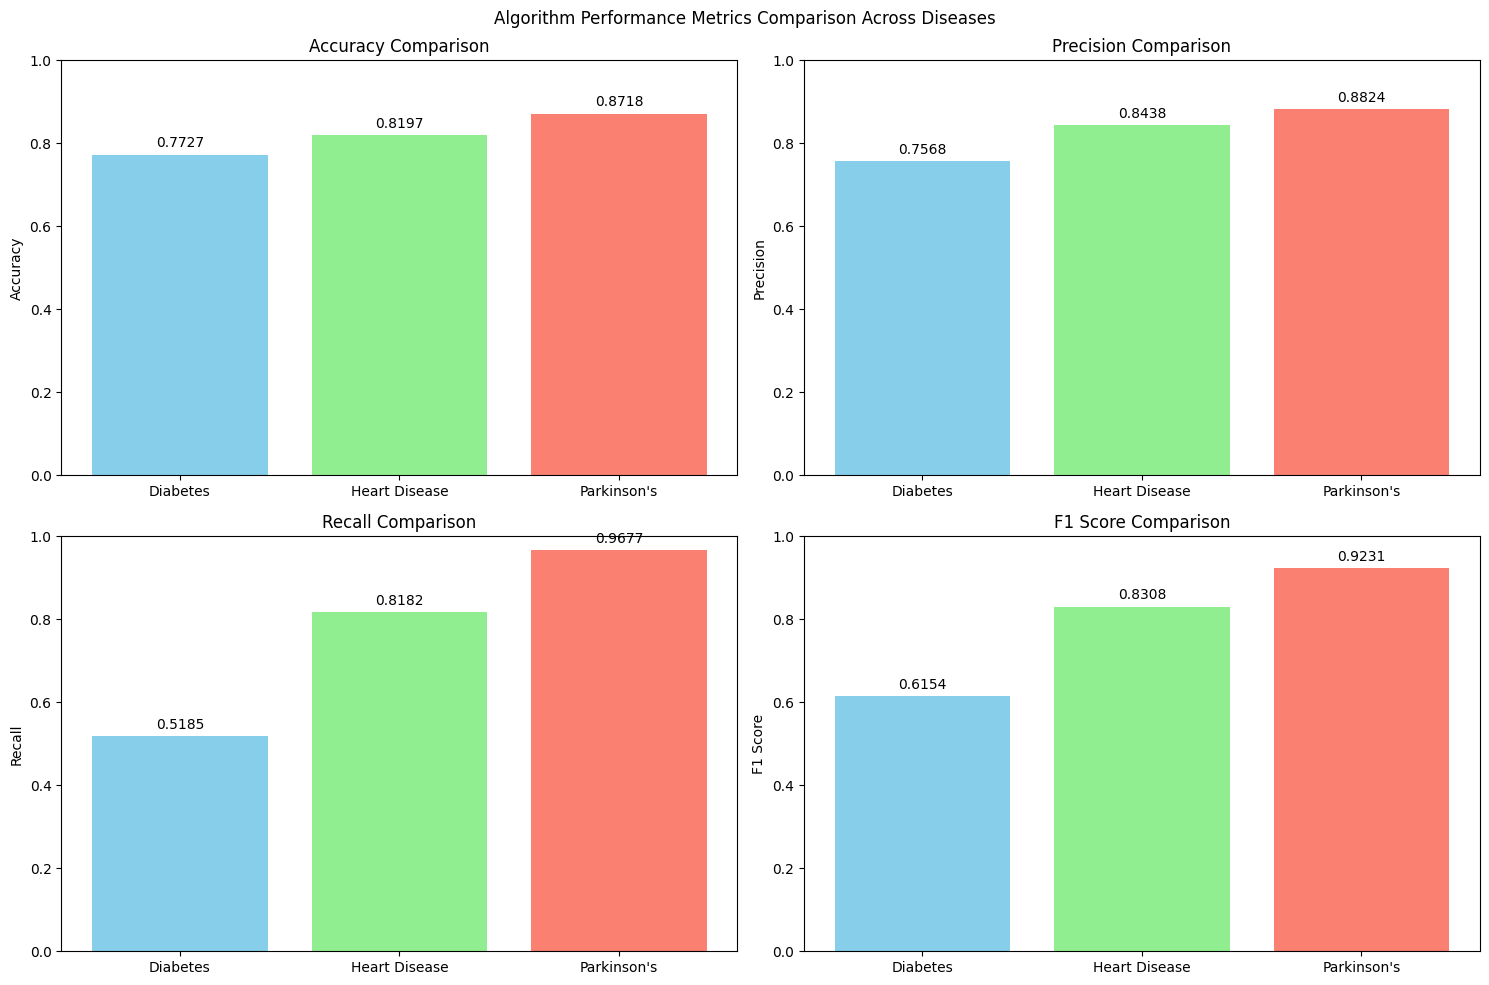

In [15]:
# Summary of all metrics
diseases = ['Diabetes', 'Heart Disease', 'Parkinson\'s']
algorithms = ['SVM (Linear)', 'Logistic Regression', 'SVM (Linear)']
accuracies = [accuracy_d, accuracy_h, accuracy_p]
precisions = [precision_d, precision_h, precision_p]
recalls = [recall_d, recall_h, recall_p]
f1_scores = [f1_d, f1_h, f1_p]
aucs = [auc_d, auc_h, auc_p]

summary_df = pd.DataFrame({
    'Disease': diseases,
    'Algorithm': algorithms,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'AUC': aucs
})

print("Comprehensive Algorithm Performance Summary:")
print(summary_df.round(4))

# Bar plot comparison for multiple metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Algorithm Performance Metrics Comparison Across Diseases')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metric_data = [accuracies, precisions, recalls, f1_scores]
colors = ['skyblue', 'lightgreen', 'salmon']

for i, (metric, data) in enumerate(zip(metrics, metric_data)):
    ax = axes[i//2, i%2]
    bars = ax.bar(diseases, data, color=colors)
    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel(metric)
    ax.set_ylim(0, 1)
    for bar, val in zip(bars, data):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{val:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()